In [2]:
import numpy as np
from numpy import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #Loading the MNIST Dataset
print("Shape of Training Data before flattening the arrays: ", x_train.shape)
print("Shape of Testing Data before flattening the arrays: ", x_test.shape)


Shape of Training Data before flattening the arrays:  (60000, 28, 28)
Shape of Testing Data before flattening the arrays:  (10000, 28, 28)


Now we need to scale the dataset to make it easier for model to compute the values. The larger the numbers the more computation is required.
The highest value that a pixel can take in this dataset is 255. 0 means Black and 255 means White.
Dividing each pixel value by 255 will give us scaled data for easier computations.

After that we will flatten the 2D arrays in pixels into 1D array to match the input of models

In [4]:
X_train = x_train / 255
X_test = x_test / 255
x_train_flattened = x_train.reshape(len(X_train), 28*28) #converting the 2D array of image into 1D array of 60000 images
x_test_flattened = x_test.reshape(len(X_test), 28*28)
print("Shape of Training Data after flattening the arrays: ",x_train_flattened.shape)
print("Shape of Testinng Data after flattening the arrays: ",x_test_flattened.shape) 


Shape of Training Data after flattening the arrays:  (60000, 784)
Shape of Testinng Data after flattening the arrays:  (10000, 784)


In [5]:
model = Sequential([
    Dense(units = 784, input_shape = (784,), activation = 'relu'),
    #tf.keras.layers.Dropout(0.3),
    Dense(units = 256, activation = 'relu'),
    #tf.keras.layers.Dropout(0.3),
    Dense(units = 128, activation = 'relu'),
    Dense(units = 10, activation = 'softmax')
])
model.compile(optimizer = tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8997 - accuracy: 0.9015
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1852 - accuracy: 0.9484
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1481 - accuracy: 0.9583
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1205 - accuracy: 0.9657
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1164 - accuracy: 0.9692


313/313 [==============================] - 1s 3ms/step
The accuracy of the model after testing is:  96.43999934196472 %


Text(69.0, 0.5, 'Truth')

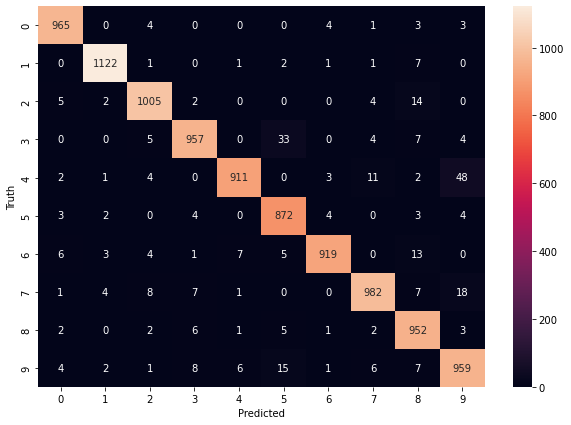

In [11]:
acc = model.evaluate(x_test_flattened, y_test)
y_pred = model.predict(x_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
print("The accuracy of the model after testing is: ", acc[1]*100, '%')
y_pred_labels[:5]
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred_labels)

import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot = True, fmt= 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")


In [12]:
false_pred = [i for i in range(len(y_test)) if y_test[i]!= y_pred_labels[i]] #List Comprehension to get the indices of the wronlgy predicted images from Testing Data
print("Total Wrong Predictions: ", len(false_pred), " out of ", len(x_test))

Total Wrong Predictions:  356  out of  10000


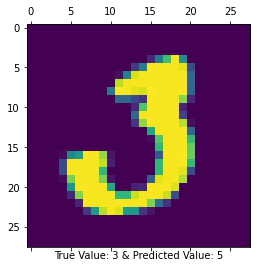

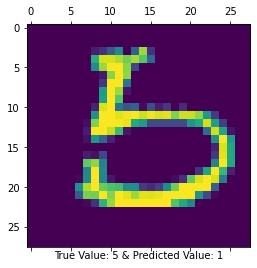

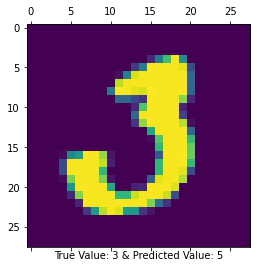

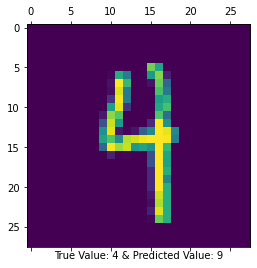

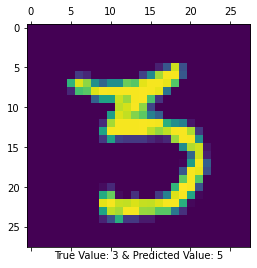

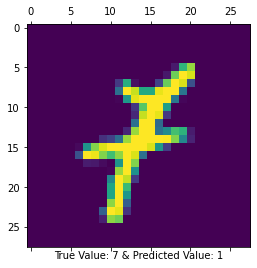

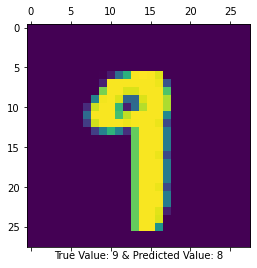

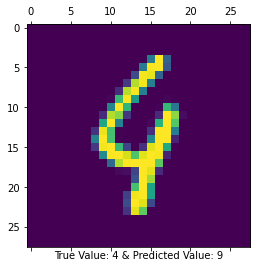

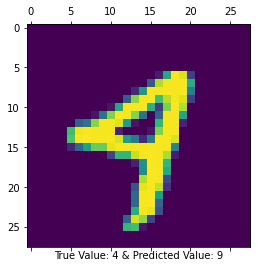

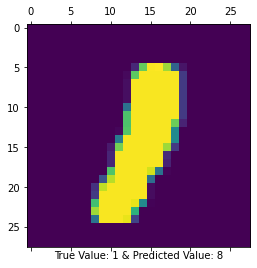

In [14]:
Rand_Range = 10 #No of Randomly selected wrong predictions to see the results
for i in range(Rand_Range):
    randind = random.randint(0, len(false_pred))
    plt.matshow(x_test[false_pred[randind]])
    plt.xlabel("True Value: "+str(y_test[false_pred[randind]])+' & Predicted Value: '+ str(y_pred_labels[false_pred[randind]]))


In [9]:
# n = len(x_train)

# for i in range(10):
#     ind = random.randint(n-1)
#     plt.matshow(x_train[ind])
#     plt.title = ind
#     plt.show()
#     print(y_train[ind])

